In [2]:
import json
import os
import pandas as pd
import random
from PIL import Image
import matplotlib.pyplot as plt
import base64
import io
import pyperclip

In [9]:
DATASET_PATH = "../Dataset"
ANNOTATION_PATH = "../Dataset/annotation.json"

with open(ANNOTATION_PATH, 'r') as f:
    df = json.load(f)

print(len(df))
print(os.listdir(DATASET_PATH))

274
['annotation.json', '.DS_Store', 'annotation.csv', 'UrbanFlowComplexity', 'SafetyCompliance', 'PerceptionReasoning']


In [10]:
'''OR1.png': {'path': 'SafetyCompliance/ObstacleRecognition/OR1.png',
  'category': 'SafetyCompliance/ObstacleRecognition',
  'question': 'The autonomous vehicle is approaching a closed gate. What is the correct course of action?',
  'answers': 'Approach the gate, stop at a safe distance, and wait for it to open before proceeding.',
  'distractor1': 'Drive directly up to the gate to make it open faster.',
  'distractor2': 'Assume the gate is for exit only and look for another entrance.',
  'distractor3': 'Attempt to tailgate another car through the gate.'},'''

"OR1.png': {'path': 'SafetyCompliance/ObstacleRecognition/OR1.png',\n  'category': 'SafetyCompliance/ObstacleRecognition',\n  'question': 'The autonomous vehicle is approaching a closed gate. What is the correct course of action?',\n  'answers': 'Approach the gate, stop at a safe distance, and wait for it to open before proceeding.',\n  'distractor1': 'Drive directly up to the gate to make it open faster.',\n  'distractor2': 'Assume the gate is for exit only and look for another entrance.',\n  'distractor3': 'Attempt to tailgate another car through the gate.'},"

In [11]:
id_list = []
image_path_list = []
question_list = []
explanation_list = []
answer_list = []

for data in df:
    id_list.append(data.split(".")[0])
    image_path_list.append(os.path.join(DATASET_PATH, df[data]['path']))
    question_list.append(df[data]['question'])
    explanation_list.append(df[data]['answers'])
    answer_list.append({
        'A': df[data]['answers'],
        'B': df[data]['distractor1'],
        'C': df[data]['distractor2'],
        'D': df[data]['distractor3'],
        })
    break

print(id_list[0])
print(image_path_list[0])
print(question_list[0])
print(explanation_list[0])
print(answer_list[0])

OR1
../Dataset/SafetyCompliance/ObstacleRecognition/OR1.png
The autonomous vehicle is approaching a closed gate. What is the correct course of action?
Approach the gate, stop at a safe distance, and wait for it to open before proceeding.
{'A': 'Approach the gate, stop at a safe distance, and wait for it to open before proceeding.', 'B': 'Drive directly up to the gate to make it open faster.', 'C': 'Assume the gate is for exit only and look for another entrance.', 'D': 'Attempt to tailgate another car through the gate.'}


In [22]:
df_columns=['index','id','image', 'question', 'A', 'B', 'C', 'D', 'answer', 'explanation']
option_labels = ['A', 'B', 'C', 'D']
pd.DataFrame(columns=df_columns)

,index,id,image,question,A,B,C,D,answer,explanation


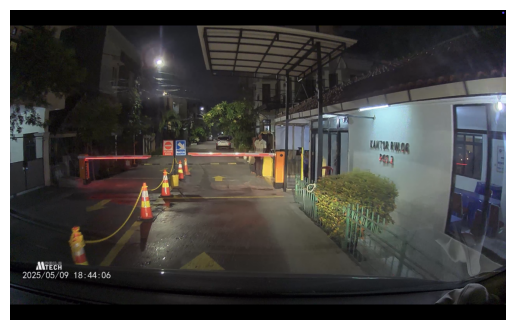

In [13]:
def encode_base64(im_path):
    # Determine the image format (optional but good practice)
    # You can hardcode this if you know the format, e.g., format="PNG"
    img_format = im_path.split('.')[-1].upper()
    if img_format == 'JPG':
        img_format = 'JPEG'

    try:
        # 1. Open the image
        image = Image.open(im_path)

        # 2. Create a byte buffer
        buffered = io.BytesIO()

        # 3. Save the image to the buffer in its original format
        image.save(buffered, format=img_format)

        # 4. Get the byte value and encode it
        img_byte = buffered.getvalue()
        base64_encoded_string = base64.b64encode(img_byte)

        # 5. Decode the bytes to a UTF-8 string
        base64_string = base64_encoded_string.decode('utf-8')

        return base64_string

    except FileNotFoundError:
        print(f"Error: The file at {im_path} was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

def showImage(im):
    try:
        # 1. Decode the Base64 string into bytes
        image_bytes = base64.b64decode(im)

        # 2. Use io.BytesIO to read the bytes as a file
        image_buffer = io.BytesIO(image_bytes)

        # 3. Open the image with Pillow and display with Matplotlib
        image = Image.open(image_buffer)
        
        plt.imshow(image)
        plt.axis('off')  # Hide the axes
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

im = encode_base64(image_path_list[0])
showImage(im)
pyperclip.copy(im)

In [ ]:
processed_data = []

# Iterate over each item in your original data
for i, data in enumerate(df.items()):
    data_key, values = data
    # 1. Store the original correct answer text
    correct_answer_text = values['answers']

    # 2. Collect all options into a list
    all_options = [
        values['answers'],
        values['distractor1'],
        values['distractor2'],
        values['distractor3']
    ]

    # 3. Shuffle the options randomly
    random.shuffle(all_options)

    # 4. Find the new position (0, 1, 2, or 3) of the correct answer
    correct_option_index = all_options.index(correct_answer_text)

    # 5. Get the corresponding label ('A', 'B', 'C', or 'D') for the correct answer
    correct_option_label = option_labels[correct_option_index]

    # 6. Build a dictionary for the current row
    row_data = {
        'index':i,
        'id': data_key.split('.')[0],
        'image': encode_base64(os.path.join(DATASET_PATH, values['path'])),
        'question': values['question'],
        'A': all_options[0],
        'B': all_options[1],
        'C': all_options[2],
        'D': all_options[3],
        'answer': correct_option_label, # The randomized label ('A', 'B', 'C', or 'D')
        'explanation': correct_answer_text # The original, unchanging answer text
    }
    processed_data.append(row_data)

# Create the DataFrame from the list of processed row data
final_df = pd.DataFrame(processed_data, columns=df_columns)

# Save the DataFrame to an Excel file, without the pandas index
output_filename = '../Dataset/annotation.csv'
final_df.to_csv(output_filename, index=False)

print(f"Successfully created '{output_filename}'")
print("\nFirst 5 rows of the new DataFrame:")
final_df.head()


Successfully created '../Dataset/annotation.csv'

First 5 rows of the new DataFrame:


,index,id,image,question,A,B,C,D,answer,explanation
0,0,OR1,iVBORw0KGgoAAAANSUhEUgAAC0AAAAcICAYAAACv5EAVAA...,The autonomous vehicle is approaching a closed...,Attempt to tailgate another car through the gate.,"Approach the gate, stop at a safe distance, an...",Assume the gate is for exit only and look for ...,Drive directly up to the gate to make it open ...,B,"Approach the gate, stop at a safe distance, an..."
1,1,OR10,iVBORw0KGgoAAAANSUhEUgAAC0AAAAcICAYAAACv5EAVAA...,An obstacle is partially blocking the vehicle'...,Steer slightly to the right to safely maneuver...,Accelerate to get past the obstacle as quickly...,"Maintain course and speed, assuming the obstac...",Come to a complete stop and wait for the obsta...,A,Steer slightly to the right to safely maneuver...
2,2,OR11,iVBORw0KGgoAAAANSUhEUgAAC0AAAAcICAYAAACv5EAVAA...,"As a responsible driver, how should you naviga...",Honk the horn to make the obstacle move out of...,Try to squeeze between the obstacle and the la...,"When the right lane is clear, signal and steer...",Move into the right lane without signaling to ...,C,"When the right lane is clear, signal and steer..."
3,3,OR12,iVBORw0KGgoAAAANSUhEUgAAC0AAAAcICAYAAACv5EAVAA...,The autonomous vehicle is exiting a building. ...,Proceed as soon as the gate starts opening to ...,"Activate the turn signal, wait for the gate to...",Exit without a turn signal as it's the only path.,Accelerate quickly out of the gate to merge in...,B,"Activate the turn signal, wait for the gate to..."
4,4,OR13,iVBORw0KGgoAAAANSUhEUgAABusAAANwCAYAAAAm9leLAA...,The road ahead is narrow due to parked vehicle...,Turn on hazard lights and stop until the parke...,Proceed slowly and expect oncoming traffic to ...,Wait for a sufficient gap in oncoming traffic ...,Accelerate to pass through the narrow gap befo...,C,Wait for a sufficient gap in oncoming traffic ...


In [24]:
output_filename = '/Users/rx0/Desktop/Thesis/Experiment/JktDriveVLM/Dataset/annotation.csv'
test_df = pd.read_csv(output_filename)

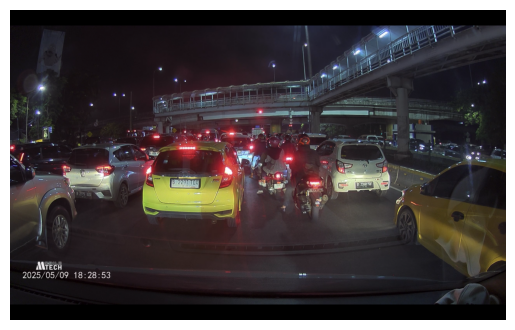

In [25]:
im = test_df.sample(1)['image'].item()
showImage(im)
pyperclip.copy(test_df.sample(1)['image'].item())

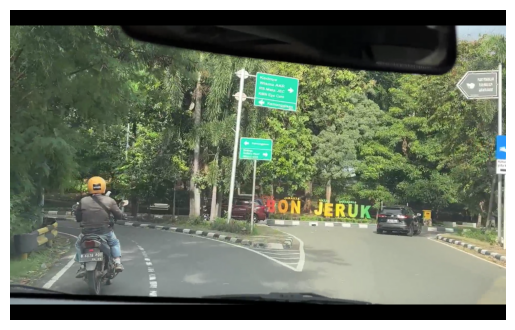

In [26]:
im = test_df.sample(1)['image'].item()
showImage(im)

In [27]:
test_df.to_csv('output.tsv', sep='\t')

In [28]:
sample_df = test_df.sample(2)
sample_df.to_csv('output.tsv', sep='\t', index=False)

In [29]:
tsv_df = pd.read_csv('output.tsv', sep='\t')
tsv_df.head()

,Unnamed: 0,index,id,image,question,A,B,C,D,answer,explanation
0,227,227,VCI19,iVBORw0KGgoAAAANSUhEUgAAC0AAAAcICAYAAACv5EAVAA...,The agent is currently switching lanes. Based ...,The motorcycle that might cut in front of the ...,The pedestrians on the sidewalk.,The quality of the road markings.,The car far ahead in the target lane.,A,The motorcycle that might cut in front of the ...
1,19,19,LSP13,iVBORw0KGgoAAAANSUhEUgAAC0AAAAcICAYAAACv5EAVAA...,The passenger in the vehicle is trying to get ...,Stop and park in the current possition,Immediately park to the left of the black car,The car cannot be parked on the side of the ro...,Go forward slowly and look for an opening to park,C,The car cannot be parked on the side of the ro...
